### Dependencias

In [27]:
%pip install -q plotly
%pip install -q --upgrade nbformat
import plotly.graph_objects as go
import numpy as np

## Ejercicio 1: Lagrange — Casos básicos (I)

Se pretende optimizar el siguiente problema:
$$
\begin{aligned}
\mathrm{maximizar} \quad f(x,y)= x + y & \\
\text{ sujeto a } \quad g(x, y) \equiv x^2 + y^2 &= 1
\end{aligned}
$$
usando el método de los multiplicadores de Lagrange. A continuación se definen en Python varias funciones relevantes para este caso de estudio:


In [28]:
# Define the objective function f(x, y)
def f(x, y):
    return x + y

def grad_f(x, y):
    return np.array([1, 1])

# Define the constraint function g(x, y)
def g(x, y):
    return x**2 + y**2 - 1

# Define the Lagrangian function L(x, y, lambda)
def lagrangian(x, y, lambda_):
    return f(x, y) + lambda_ * g(x, y)

 - **1a** El siguiente bloque de código muestra en un gráfico 3D la función a maximizar $f(x,y)$, la restricción $g(x,y)$ sobre el plano $OXY$ y su proyección sobre $f(x,y)$. Estima visualmente dónde aparecerá el máximo del problema.

In [29]:
# Create a grid of x and y values
x = np.linspace(-1.1, 1.1, 200)
y = np.linspace(-1.1, 1.1, 200)
X, Y = np.meshgrid(x, y)

# Calculate the function values
Z = X + Y
Z2 = np.cos(X) + np.sin(Y)

# Create the 3D surface plot
fig = go.Figure()

# Add the 3D surface plot for the function f(x, y) = x + y
fig.add_trace(go.Surface(z=Z, x=X, y=Y, name='f(x, y) = x + y', showscale=False))

# Create the 2D circle curve in the OXY plane
t = np.linspace(0, 2 * np.pi, 100)
circle_x = np.cos(t)
circle_y = np.sin(t)

trace_circle_OXY = go.Scatter3d(
    x=circle_x,
    y=circle_y,
    z=np.zeros_like(circle_x),
    mode='lines',
    marker=dict(color='black', size=20),
    line=dict(width=20),
    showlegend=False
)

# Create the 2D circle projection onto the plane z = x + y
trace_circle_proj = go.Scatter3d(
    x=circle_x,
    y=circle_y,
    z=np.cos(t) + np.sin(t),
    mode='lines',
    marker=dict(color='green', size=20),
    line=dict(width=20),
    showlegend=False
)


# Add the 2D circle curve and its projection to the 3D plot
fig.add_trace(trace_circle_OXY)
fig.add_trace(trace_circle_proj)

# Show the 3D plot
fig.show()

 - **1b** Resuelve el sistema de ecuaciones resultante de plantear el problema de Lagrange. Utiliza el módulo ```scipy.optimize``` para su resolución.

 - **1c** El siguiente bloque de código muestra las cuervas de nivel de la función a optimizar, junto con la curva restricción. En base a esta imagen, analiza geométricamente el problema de optimización de Lagrange.

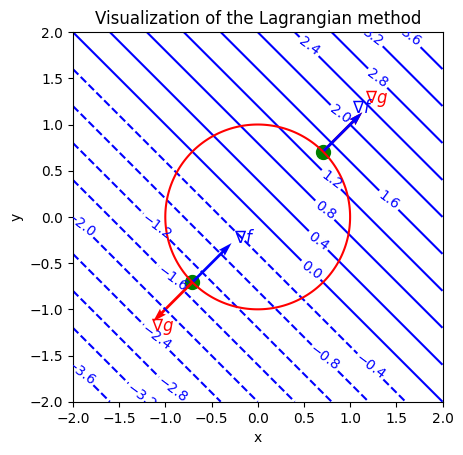

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# Create a grid of x and y values
x = np.linspace(-2, 2, 400)
y = np.linspace(-2, 2, 400)
X, Y = np.meshgrid(x, y)

# Calculate the values of the Lagrangian function for the grid
lambda_values = [-1/np.sqrt(2), 1/np.sqrt(2)]  # Values of lambda
Z = f(X, Y)

# Create contour plots for the Lagrangian function and constraint
contour_levels = 20  # Number of contour levels
contour_values = plt.contour(X, Y, Z, levels=contour_levels, colors='blue')

# Label the contour lines with their values
plt.clabel(contour_values, inline=1, fontsize=10)

# Plot the constraint contour line
constraint_values = plt.contour(X, Y, g(X, Y), levels=[0], colors='red')


# Highlight the optimal points
optimal_points = [(1/np.sqrt(2), 1/np.sqrt(2)), (-1/np.sqrt(2), -1/np.sqrt(2))]
optimal_values = [f(*point) for point in optimal_points]
plt.scatter(*zip(*optimal_points), c='green', marker='o', s=100)

# Add gradient vectors at optimal points. Add also text labels
proportionality_constant = 0.3
for point in optimal_points:
    grad_g = proportionality_constant * np.array([2*point[0], 2*point[1]])
    grad_Z = proportionality_constant * np.array([*grad_f(point[0], point[1])])
    scale_factor = np.linalg.norm(grad_g) / np.linalg.norm(grad_Z)
    plt.quiver(*point, *grad_g, color='red', angles='xy', scale_units='xy', scale=1)
    plt.quiver(*point, *grad_Z*scale_factor, color='blue', angles='xy', scale_units='xy', scale=1)
    plt.text((1.04)*point[0]+grad_g[0], (1.15)*point[1]+grad_g[1], r'$\nabla g$', color='red', fontsize=12)
    plt.text((0.9)*point[0]+(0.90)*grad_Z[0]*scale_factor, point[1]+grad_Z[1]*scale_factor, r'$\nabla f$', color='blue', fontsize=12)


# Set axis labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title('Visualization of the Lagrangian method')

plt.axis('square')
plt.show()

 - **1d** Vuelve a resolver el problema de optimización, pero ahora hazlo minimizando la función lagrangiana $\mathcal{L}$ directamente con alguna herramienta numérica (no derives). Usa de nuevo el módulo ```scipy.optimize```. Comprueba que obtienes el mismo resultado que en el apartado anterior.

 - **1e** Una vez más, utilizando el módulo ```scipy.optimize```, resuelve este problema de optimización, pero ahora directamente optimiza $f(x,y)$ imponiendo la restricción del problema. Es decir, no sigas la formulación de Lagrange, busca una herramienta que permita optimizar con condiciones.

## Ejercicio 2: Lagrange — Casos básicos (II)

Se pretende optimizar el siguiente problema:
$$
\begin{aligned}
\mathrm{maximizar} \quad f(x,y)= (x + y)^2 & \\
\text{ sujeto a } \quad g(x, y) \equiv x^2 + y^2 &= 1
\end{aligned}
$$
usando el método de los multiplicadores de Lagrange. A continuación se definen en Python varias funciones relevantes para este caso de estudio:



In [31]:
# Define the objective function f(x, y)
def f(x, y):
    return (x + y)**2

def grad_f(x, y):
    return np.array([2*x, 2*y])

# Define the constraint function g(x, y)
def g(x, y):
    return x**2 + y**2 - 1

# Define the Lagrangian function L(x, y, lambda)
def lagrangian(x, y, lambda_):
    return f(x, y) + lambda_ * g(x, y)

 - **2a** El siguiente bloque de código muestra en un gráfico 3D la función a maximizar $f(x,y)$, la restricción $g(x,y)$ sobre el plano $OXY$ y su proyección sobre $f(x,y)$. Estima visualmente dónde aparecerán los máximos del problema.

In [32]:

# Create a grid of x and y values
x = np.linspace(-1.1, 1.1, 200)
y = np.linspace(-1.1, 1.1, 200)
X, Y = np.meshgrid(x, y)

# Calculate the function values
Z = f(X,Y)
Z2 = np.cos(X) + np.sin(Y)
# Create the 3D surface plot
fig = go.Figure()

# Add the 3D surface plot
fig.add_trace(go.Surface(z=Z, x=X, y=Y, name='f(x, y) = x + y', showscale=False))

# Create the 2D circle curve in the OXY plane
t = np.linspace(0, 2 * np.pi, 100)

trace_circle_OXY = go.Scatter3d(
    x=np.cos(t),
    y=np.sin(t),
    z=np.zeros_like(x),
    mode='lines',
    marker=dict(color='black', size=20),
    line=dict(width=20),
    showlegend=False
)

trace_circle_proj = go.Scatter3d(
    x=np.cos(t),
    y=np.sin(t),
    z=f(np.cos(t), np.sin(t)),
    mode='lines',
    marker=dict(color='green', size=20),
    line=dict(width=20),
    showlegend=False
)

# Add the 2D circle projection onto the OXY plane
fig.add_trace(trace_circle_OXY)
fig.add_trace(trace_circle_proj)

fig.show()


 - **2b** Resuelve el sistema de ecuaciones resultante de plantear el problema de Lagrange. Utiliza el módulo ```scipy.optimize``` para su resolución.

 - **2c** El siguiente bloque de código muestra las cuervas de nivel de la función a optimizar, junto con la curva restricción. En base a esta imagen, analiza geométricamente el problema de optimización de Lagrange.

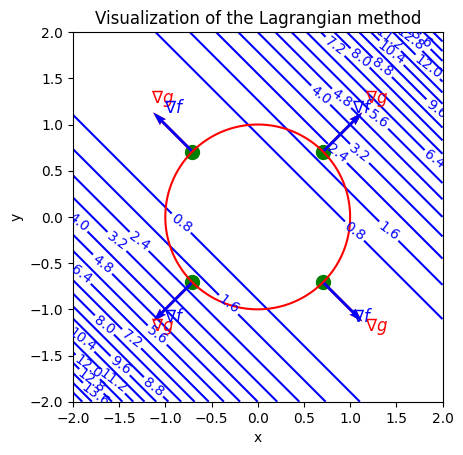

In [33]:
import numpy as np
import matplotlib.pyplot as plt

# Create a grid of x and y values
x = np.linspace(-2, 2, 400)
y = np.linspace(-2, 2, 400)
X, Y = np.meshgrid(x, y)

# Calculate the values of the Lagrangian function for the grid
lambda_values = [0, -2]  # Values of lambda
Z = f(X, Y)

# Create contour plots for the Lagrangian function and constraint
contour_levels = 20  # Number of contour levels
contour_values = plt.contour(X, Y, Z, levels=contour_levels, colors='blue')

# Label the contour lines with their values
plt.clabel(contour_values, inline=1, fontsize=10)

# Plot the constraint contour line
constraint_values = plt.contour(X, Y, g(X, Y), levels=[0], colors='red')

# Highlight the optimal points
optimal_points = [(1/np.sqrt(2), 1/np.sqrt(2)), (-1/np.sqrt(2), -1/np.sqrt(2)),
                  (-1/np.sqrt(2), 1/np.sqrt(2)), (1/np.sqrt(2), -1/np.sqrt(2))]
optimal_values = [f(*point) for point in optimal_points]
plt.scatter(*zip(*optimal_points), c='green', marker='o', s=100)

# Add gradient vectors at optimal points. Add also text labels
proportionality_constant = 0.3
for point in optimal_points:
    grad_g = proportionality_constant * np.array([2*point[0], 2*point[1]])
    grad_Z = proportionality_constant * np.array([*grad_f(point[0], point[1])])
    scale_factor = np.linalg.norm(grad_g) / np.linalg.norm(grad_Z)
    plt.quiver(*point, *grad_g, color='red', angles='xy', scale_units='xy', scale=1)
    plt.quiver(*point, *grad_Z*scale_factor, color='blue', angles='xy', scale_units='xy', scale=1)
    plt.text((1.04)*point[0]+grad_g[0], (1.15)*point[1]+grad_g[1], r'$\nabla g$', color='red', fontsize=12)
    plt.text((0.9)*point[0]+(0.90)*grad_Z[0]*scale_factor, point[1]+grad_Z[1]*scale_factor, r'$\nabla f$', color='blue', fontsize=12)


# Set axis labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title('Visualization of the Lagrangian method')

plt.axis('square')
plt.show()

 - **2d** Utilizando el módulo ```scipy.optimize```, resuelve este problema de optimización, pero ahora directamente optimiza $f(x,y)$ imponiendo la restricción del problema. Es decir, no sigas la formulación de Lagrange, busca una herramienta que permita optimizar con condiciones.

## Ejercicio 3: Lagrange — Casos básicos (III)

Se pretende optimizar el siguiente problema:
$$
\begin{aligned}
\mathrm{maximizar} \quad f(x,y)= x^2y & \\
\text{ sujeto a } \quad g(x, y) \equiv x^2 + y^2 &= 3
\end{aligned}
$$
usando el método de los multiplicadores de Lagrange. A continuación se definen en Python varias funciones relevantes para este caso de estudio:



In [34]:
# Define the objective function f(x, y)
def f(x, y):
    return x**2 * y

def grad_f(x, y):
    return np.array([2*x*y, x**2])

# Define the constraint function g(x, y)
def g(x, y):
    return x**2 + y**2 - 3

# Define the Lagrangian function L(x, y, lambda)
def lagrangian(x, y, lambda_):
    return f(x, y) + lambda_ * g(x, y)

 - **3a** El siguiente bloque de código muestra en un gráfico 3D la función a maximizar $f(x,y)$, la restricción $g(x,y)$ sobre el plano $OXY$ y su proyección sobre $f(x,y)$. Estima visualmente dónde aparecerán los máximos del problema.

In [35]:

# Create a grid of x and y values
x = np.linspace(-1.1, 1.1, 200)
y = np.linspace(-1.1, 1.1, 200)
X, Y = np.meshgrid(x, y)

# Calculate the function values
Z = f(X,Y)
Z2 = 3 * (np.cos(X) + np.sin(Y))
# Create the 3D surface plot
fig = go.Figure()

# Add the 3D surface plot
fig.add_trace(go.Surface(z=Z, x=X, y=Y, name='f(x, y) = x + y', showscale=False))

# Create the 2D circle curve in the OXY plane
t = np.linspace(0, 2 * np.pi, 100)

trace_circle_OXY = go.Scatter3d(
    x=np.cos(t),
    y=np.sin(t),
    z=np.zeros_like(x),
    mode='lines',
    marker=dict(color='black', size=20),
    line=dict(width=20),
    showlegend=False
)

trace_circle_proj = go.Scatter3d(
    x=np.cos(t),
    y=np.sin(t),
    z=f(np.cos(t), np.sin(t)),
    mode='lines',
    marker=dict(color='green', size=20),
    line=dict(width=20),
    showlegend=False
)

# Add the 2D circle projection onto the OXY plane
fig.add_trace(trace_circle_OXY)
fig.add_trace(trace_circle_proj)

fig.show()


 - **3b** Resuelve el sistema de ecuaciones resultante de plantear el problema de Lagrange. Utiliza el módulo ```scipy.optimize``` para su resolución.

 - **3c** El siguiente bloque de código muestra las cuervas de nivel de la función a optimizar, junto con la curva restricción. En base a esta imagen, analiza geométricamente el problema de optimización de Lagrange.

<ipython-input-36-1a3afbb8545c>:36: RuntimeWarning:

divide by zero encountered in double_scalars

<ipython-input-36-1a3afbb8545c>:38: RuntimeWarning:

invalid value encountered in multiply

<ipython-input-36-1a3afbb8545c>:40: RuntimeWarning:

invalid value encountered in double_scalars



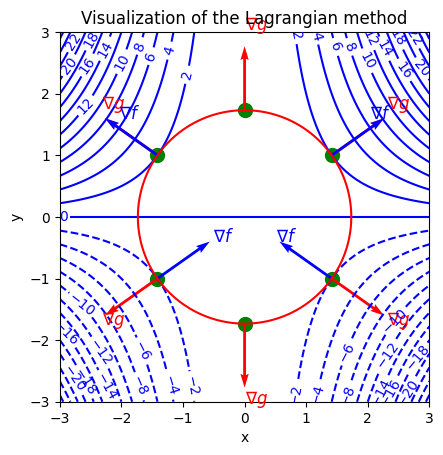

In [36]:
import numpy as np
import matplotlib.pyplot as plt

# Create a grid of x and y values
x = np.linspace(-3, 3, 400)
y = np.linspace(-3, 3, 400)
X, Y = np.meshgrid(x, y)

# Calculate the values of the Lagrangian function for the grid
lambda_values = [-1, 1, 0]  # Values of lambda
Z = f(X, Y)

# Create contour plots for the Lagrangian function and constraint
contour_levels = 26  # Number of contour levels
contour_values = plt.contour(X, Y, Z, levels=contour_levels, colors='blue')

# Label the contour lines with their values
plt.clabel(contour_values, inline=1, fontsize=10)

# Plot the constraint contour line
constraint_values = plt.contour(X, Y, g(X, Y), levels=[0], colors='red')

# Highlight the optimal points
optimal_points = [(np.sqrt(2), 1),  (-np.sqrt(2), 1),
                  (np.sqrt(2),-1), (-np.sqrt(2),-1),
                  (0, np.sqrt(3)), (0,-np.sqrt(3))]

optimal_values = [f(*point) for point in optimal_points]
plt.scatter(*zip(*optimal_points), c='green', marker='o', s=100)

# Add gradient vectors at optimal points. Add also text labels
proportionality_constant = 0.3
for point in optimal_points:
    grad_g = proportionality_constant * np.array([2*point[0], 2*point[1]])
    grad_Z = proportionality_constant * np.array([*grad_f(point[0], point[1])])
    scale_factor = np.linalg.norm(grad_g) / np.linalg.norm(grad_Z)
    plt.quiver(*point, *grad_g, color='red', angles='xy', scale_units='xy', scale=1)
    plt.quiver(*point, *grad_Z*scale_factor, color='blue', angles='xy', scale_units='xy', scale=1)
    plt.text((1.04)*point[0]+grad_g[0], (1.15)*point[1]+grad_g[1], r'$\nabla g$', color='red', fontsize=12)
    plt.text((0.9)*point[0]+(0.90)*grad_Z[0]*scale_factor, point[1]+grad_Z[1]*scale_factor, r'$\nabla f$', color='blue', fontsize=12)


# Set axis labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title('Visualization of the Lagrangian method')

plt.axis('square')
plt.show()

 - **3d** Utilizando el módulo ```scipy.optimize```, resuelve este problema de optimización, pero ahora directamente optimiza $f(x,y)$ imponiendo la restricción del problema. Es decir, no sigas la formulación de Lagrange, busca una herramienta que permita optimizar con condiciones.

## Ejercicio 4: [KKT] Restricciones con inecuaciones — caso 1

Resuelve el siguiente problema de optimización utiliza el módulo ```scipy.optimize``` (en particular, la función ```minimize```).
<center>
<div>
<img src="https://drive.upm.es/index.php/apps/files_sharing/ajax/publicpreview.php?x=1680&y=557&a=true&file=opt_restricciones_164.png&t=YzvqwRjVh1U0aXy&scalingup=0" width="450"/>
</div>
</center>


$$
\begin{aligned}
\mathrm{minimizar} \quad q(x)=\left(x_1-1\right)^2+\left(x_2-2.5\right)^2 & \\
\text { sujeto a} \quad x_1-2 x_2+2 & \geq 0, \\
-x_1-2 x_2+6 & \geq 0, \\
-x_1+2 x_2+2 & \geq 0, \\
x_1 & \geq 0, \\
x_2 & \geq 0 .
\end{aligned}
$$

In [37]:
from scipy.optimize import minimize

# minimizar:
def objective_function(x):
    return (x[0] - 1)**2 + (x[1] - 2.5)**2


# sujeto a:
def constraint1(x):
    return x[0] - 2 * x[1] + 2        # x1​ − 2x_2 ​+ 2 >= 0

def constraint2(x):
    return -x[0] - 2 * x[1] + 6       # ecuación 2 de las restricciones igual que la anterior

def constraint3(x):
    return -x[0] + 2 * x[1] + 2       # restricción 3

def constraint4(x):
    return x[0]                       # no negatividad para x_0

def constraint5(x):
    return x[1]                       # no negatividad para x_1

constraints = ({'type': 'ineq', 'fun': constraint1},
               {'type': 'ineq', 'fun': constraint2},
               {'type': 'ineq', 'fun': constraint3},
               {'type': 'ineq', 'fun': constraint4},
               {'type': 'ineq', 'fun': constraint5})

# hay que pasarle un initial guess (no entiendo muy bien cómo afecta) https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html
initial_guess = [0, 0]

result = minimize(objective_function, initial_guess, constraints=constraints)

print("Valor mínimo de la función objetivo:", result.fun)
print("Valores de x que minimizan la función:", result.x)

Valor mínimo de la función objetivo: 0.799999999999998
Valores de x que minimizan la función: [1.39999999 1.69999999]


## Ejercicio 5: [KKT] Restricciones con inecuaciones — caso 2

Resuelve el siguiente problema de optimización utiliza el módulo ```scipy.optimize``` (en particular, la función ```minimize```).
$$
\begin{aligned}
\mathrm{minimizar} \quad q(x) = 2x_1 + 3x_2 + 4x_1^2 + 2x_1x_2 + x_2^2 & \\
\text { sujeto a} \quad x_1 - x_2 \geq 0, \\
x_1 + x_2 \leq 4, \\
x_1 \leq 3, \\
\end{aligned}
$$

In [38]:
from scipy.optimize import minimize

# maximizar:
def objective_function(x):
    return 2 * x[0] + 3 * x[1] + 4 * x[0]**2 + 2 * x[0] * x[1] + x[1]**2

# sujeto a:
"""
  Se supone que se espera que estas funciones devuelvan valores >= 0 pero minimize
  se encarga de ello
"""
def constraint1(x):
    return x[0] - x[1]

def constraint2(x):
    return x[0] + x[1] - 4

def constraint3(x):
    return x[0] - 3

# recopilar para pasárselo a minimize
constraints = ({'type': 'ineq', 'fun': constraint1},
               {'type': 'ineq', 'fun': constraint2},
               {'type': 'ineq', 'fun': constraint3})

initial_guess = [0, 0]

result = minimize(objective_function, initial_guess, constraints=constraints)


print("Valor mínimo de la función objetivo: ", result.fun)
print("Valores de x que minimizan la función: ", result.x)

Valor mínimo de la función objetivo:  52.0000000000016
Valores de x que minimizan la función:  [3. 1.]


## Ejercicio 6: Estudio analítico de un algoritmo de optimización numérica

Como has visto en los ejercicios anteriores, la función ```minimize``` del módulo ```scipy.optimize``` es ampliamente usada para problemas de optimización no entera. Esta función implementa multitud de algoritmos que permiten resolver problemas de diversa índole: con información sobre el jacobiano/hessiano o sin ella, problemas acotados, con restricciones de igualdad o de desigualdad, etc.

Explica un algoritmo de los implementados en la función ```minimize``` ([ver documentación](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html#id9), argumento ```method```), según la asignación realizada en clase.

*Escribe una breve explicación (aprox. 1 cara de A4) para la entrega, y estate preparado para explicar el método en la defensa*.

## Ejercicio 7: Casos de aplicación (I)

El departamento financiero de una empresa de venta y reparación de ordenadores desea maximizar su beneficio mensual ($B$) que depende de las unidades vendidas ($v$), las unidades reparadas ($r$), el número de trabajadores ($t$), y el número de clientes ($c$). El beneficio se puede modelar como sigue:

$$
B(v, r, t, c) = 20000 - 4(v - 100)^2 - 3(r - 50)^2 - t^2 + 5c^2
$$

Se sabe que la expresión anterior funciona correctamente solo cuando las unidades vendidas ($v$) están en el rango de $5$ a $100$, el número de trabajadores ($t$) es menor que $100$ y el número de ordenadores vendidos ($v$) más reparados ($r$) es menor que $102$. Además, por imposición del departamento laboral, la empresa debe contar con como mínimo dos trabajadores ($t$) por cada cliente ($c$).
 - **7a** Calcula $(v, r, t, c)$ que maximizan los beneficios de la empresa por *fuerza bruta*.


In [39]:
from scipy.optimize import minimize

# maximizar la función;
def negative_objective_function(vars):
    v, r, t, c = vars
    return -(20000 - 4 * (v - 100)**2 - 3 * (r - 50)**2 - t**2 + 5 * c**2)


"""
  aquí asumo que se le pasa una lista con la cifra
  de unidades vendidas y reparadas de cada cosa [v, r, t, c]
"""
# sujeto a:
def constraint1(vars):
    v, r, t, c = vars
    return v - 5            # unidades vendidas, v - 5 >= 0

def constraint2(vars):
    v, r, t, c = vars
    return 100 - v          # unidades vendidas, 100 - v >= 0

def constraint3(vars):
    v, r, t, c = vars
    return r                # unidades reparadas (se puede reparar cualquier cantidad)

def constraint4(vars):
    v, r, t, c = vars
    return t - 2            # nº de trabajadores (t - 2 >= 0)

def constraint5(vars):
    v, r, t, c = vars
    return 100 - t          # nº de trabajadores (100 - t >= 0), tiene que haber menos de 100 trabajadores

def constraint6(vars):
    v, r, t, c = vars
    return v + r - 102      # unidades vendidas y reparadas < 102

def constraint7(vars):
    v, r, t, c = vars
    return 2 * t - c        # asegurar que haya 2 trabajadores por cliente


constraints = ({'type': 'ineq', 'fun': constraint1},
               {'type': 'ineq', 'fun': constraint2},
               {'type': 'ineq', 'fun': constraint3},
               {'type': 'ineq', 'fun': constraint4},
               {'type': 'ineq', 'fun': constraint5},
               {'type': 'ineq', 'fun': constraint6},
               {'type': 'ineq', 'fun': constraint7})

              #  v    r   t   c
initial_guess = [50, 25, 50, 10]    # por ejemplo

result = minimize(negative_objective_function, initial_guess, constraints=constraints)

print("Beneficio máximo obtenido: ", -result.fun)          # sale negativo por algun motivo
print("Valores que maximizan el beneficio: ", result.x)


Beneficio máximo obtenido:  210000.10528075448
Valores que maximizan el beneficio:  [100.00000836  50.00025463 100.00000837 200.00005348]


 - **7b** Calcula $(v, r, t, c)$ que maximizan los beneficios de la empresa utilizando la librería ```gurobipy``` de Python.

In [40]:
%pip install -q gurobipy

## Ejercicio 8: Casos de aplicación (II)

Considera una cierta empresa que produce dos artículos: tazas y platos. Esto es lo que sabemos:

 - Una vez fabricada, una taza se vende a 27 € y un plato a 21 €.
 - Cada taza cuesta 10 € en materiales y 14 € en mano de obra (fijos).
 - Cada plato cuesta 9 € en materiales y 10 € en mano de obra (fijos).
 - Para fabricar cada taza se necesitan 2.2 horas de trabajo.
 - Para fabricar cada plato se necesita 1 hora de trabajo.
 - La empresa dispone de una cantidad ilimitada de materias primas.
 - Debido al número limitado de trabajadores, la empresa dispone de un máximo de 100 horas de mano de obra.
 - La demanda de tazas es ilimitada, pero la de platos es de 30 unidades.

El objetivo de la empresa es maximizar los beneficios. Resuelve este problema de optimización usando el paquete ```gurobipy```.

In [41]:
import gurobipy as gp
from gurobipy import GRB

model = gp.Model("Maximizador de beneficios")

tazas = model.addVar(vtype=GRB.CONTINUOUS, name="tazas")
platos = model.addVar(vtype=GRB.CONTINUOUS, name="platos")

# maximizar esta función:
model.setObjective((27 * tazas + 21 * platos) - (10 * tazas + 14 * platos) - (9 * tazas + 10 * platos), sense=GRB.MAXIMIZE)

# sujeto a:
model.addConstr((2.2 * tazas + platos) <= 100, "mano_de_obra")        # tiempo de la mano de obra
model.addConstr(platos <= 30, "demanda_platos")                       # demanda máxima de platos (<= asumiendo que es un máximo, pero se puede cambiar por ==)

model.optimize()

print(f"Beneficio máximo: {model.objVal}")
print(f"Tazas producidas: {tazas.x}")
print(f"Platos producidos: {platos.x}")

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (linux64 - "Ubuntu 22.04.3 LTS")

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Optimize a model with 2 rows, 2 columns and 3 nonzeros
Model fingerprint: 0x2f1dd4ca
Coefficient statistics:
  Matrix range     [1e+00, 2e+00]
  Objective range  [3e+00, 8e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [3e+01, 1e+02]
Presolve removed 2 rows and 2 columns
Presolve time: 0.01s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    3.6363636e+02   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.01 seconds (0.00 work units)
Optimal objective  3.636363636e+02
Beneficio máximo: 363.6363636363636
Tazas producidas: 45.45454545454545
Platos producidos: 0.0


## Ejercicio 9: Regresión lineal

La regresión puede verse como un problema de optimización. Podemos aprovechar la estructura computacional que montamos en las clases anteriores para estudiar casos de regresión. Comencemos con el caso más simple posible: la regresión lineal. Piensa en una red formada por una única neurona con un único input. La operación que realiza esta neurona sobre el input es una aplicación lineal de la forma $wx+b$. Por tanto, como el, objetivo del entrenamiento sobre una red neuronal es optimizar $w$ y $b$, en verdad se está resolviendo una problema de regresión.

Usaremos las siguientes clases que ya programamos en clases anteriores:

In [42]:
from abc import ABC, abstractmethod

class Layer_Dense:

    def __init__(self, n_inputs, n_neurons):
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))

    def forward(self, inputs):
        self.inputs = inputs
        self.output = np.dot(inputs, self.weights) + self.biases

    def backward(self, dvalues):
        self.dweights = np.dot(self.inputs.T, dvalues)
        self.dbiases = np.sum(dvalues, axis=0, keepdims=True)
        self.dinputs = np.dot(dvalues, self.weights.T)


class Activation_ReLU:

    def forward(self, inputs):
        self.inputs = inputs
        self.output = np.maximum(0, inputs)

    def backward(self, dvalues):
        self.dinputs = dvalues.copy()
        self.dinputs[self.inputs <= 0] = 0


class Optimizer_SGD:

    def __init__(self, learning_rate=1., decay=0., momentum=0.):
        self.learning_rate = learning_rate
        self.current_learning_rate = learning_rate
        self.decay = decay
        self.iterations = 0
        self.momentum = momentum

    def pre_update_params(self):
        if self.decay:
            self.current_learning_rate = self.learning_rate * (1. / (1. + self.decay * self.iterations))

    def update_params(self, layer):

        if self.momentum:

            if not hasattr(layer, 'weight_momentums'):
                layer.weight_momentums = np.zeros_like(layer.weights)
                layer.bias_momentums = np.zeros_like(layer.biases)

            weight_updates = self.momentum * layer.weight_momentums - self.current_learning_rate * layer.dweights
            layer.weight_momentums = weight_updates

            bias_updates = self.momentum * layer.bias_momentums - self.current_learning_rate * layer.dbiases
            layer.bias_momentums = bias_updates

        else:
            weight_updates = -self.current_learning_rate * layer.dweights
            bias_updates = -self.current_learning_rate * layer.dbiases

        layer.weights += weight_updates
        layer.biases += bias_updates

    def post_update_params(self):
        self.iterations += 1


class Loss(ABC):

    @abstractmethod
    def forward(self, output, y):
        pass

    def calculate(self, output, y):
        sample_losses = self.forward(output, y)
        data_loss = np.mean(sample_losses)
        return data_loss

La función de activación que usaremos es:

In [43]:
class Activation_Linear:
    # Forward pass
    def forward(self, inputs):
        self.inputs = inputs
        self.output = inputs

    # Backward pass
    def backward(self, dvalues):
        self.dinputs = dvalues.copy()

 - **9a** Programa la nueva función de pérdidas: el error cuadrático medio (MSE). Llámala ```Loss_MeanSquaredError```. No olvides heredar de la clase abstracta ```Loss```, e implementar tanto el *forward* como el *backward pass*.

In [44]:
class Loss_MeanSquaredError(Loss):
    # Forward pass
    def forward(self, y_pred, y_true):
        sample_losses = np.mean((y_true - y_pred) ** 2, axis=-1)
        # sample_losses = (y_true - y_pred) ** 2
        return sample_losses


    # Backward pass
    def backward(self, y_pred, y_true):
        outputs = len(y_pred[0])
        samples = len(y_pred)
        self.dinputs = -2.0 * (y_true - y_pred) / outputs

        # Normalization
        self.dinputs /= samples

 - **9b** Define una arquitectura red con una única neurona (un input), función de activación lineal, error cuadrático medio como función de pérdidas y un optimizador de descenso de gradiente (*learning rate* de 0.01, resto de parámetros por defecto). Realiza un entrenamiento en dicha red y observa el resultado obtenido. En particular, asegúrate que el peso y el bias de la neurona coinciden con los que obtendrías resolviendo el problema de regresión de forma tradicional (derivando el MSE respecto a cada parámetro, igualando a cero y resolviendo el sistema resultante). Usa los siguientes datos de entrenamiento (regresión lineal):

$$
\begin{array}{|c|c|}
\hline x_i & y_i \\
\hline 1 & 6 \\
\hline 2 & 5 \\
\hline 3 & 7 \\
\hline 4 & 10 \\
\hline
\end{array}
$$


In [45]:
X = np.array([[1], [2], [3], [4]])
y = np.array([[6, 5, 7, 10]]).reshape(len(X), 1)

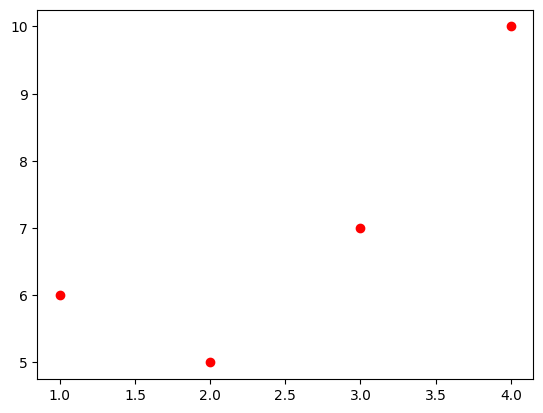

In [46]:
plt.plot(X[:, np.newaxis, 0], y, 'ro')

In [47]:
dense1 = Layer_Dense(X.shape[1], 1)
# activación lineal
loss_layer = Loss_MeanSquaredError()
optimizer = Optimizer_SGD(learning_rate=0.01)


# entrenamiento
for epoch in range(50000):
  # forward
  dense1.forward(X)
  loss = loss_layer.forward(dense1.output, y)

  if not epoch % 1000:
    print(f"epoch: {epoch}, loss: {loss}")

  # backward
  loss_layer.backward(dense1.output, y)
  dense1.backward(loss_layer.dinputs)

  optimizer.update_params(dense1)

epoch: 0, loss: [ 36.08814746  25.14703819  49.30881253 100.58815276]
epoch: 1000, loss: [1.41398711 1.57959445 0.49385793 0.72474345]
epoch: 2000, loss: [1.21979601 1.68440605 0.49019203 0.80563622]
epoch: 3000, loss: [1.21048756 1.68972083 0.49000957 0.80978211]
epoch: 4000, loss: [1.21002431 1.68998608 0.49000048 0.80998913]
epoch: 5000, loss: [1.21000121 1.68999931 0.49000002 0.80999946]
epoch: 6000, loss: [1.21000006 1.68999997 0.49       0.80999997]
epoch: 7000, loss: [1.21 1.69 0.49 0.81]
epoch: 8000, loss: [1.21 1.69 0.49 0.81]
epoch: 9000, loss: [1.21 1.69 0.49 0.81]
epoch: 10000, loss: [1.21 1.69 0.49 0.81]
epoch: 11000, loss: [1.21 1.69 0.49 0.81]
epoch: 12000, loss: [1.21 1.69 0.49 0.81]
epoch: 13000, loss: [1.21 1.69 0.49 0.81]
epoch: 14000, loss: [1.21 1.69 0.49 0.81]
epoch: 15000, loss: [1.21 1.69 0.49 0.81]
epoch: 16000, loss: [1.21 1.69 0.49 0.81]
epoch: 17000, loss: [1.21 1.69 0.49 0.81]
epoch: 18000, loss: [1.21 1.69 0.49 0.81]
epoch: 19000, loss: [1.21 1.69 0.49 0.8

In [48]:
a = float(dense1.biases.flatten()[0])
b = float(dense1.weights.flatten()[0])

print(f"la recta de regresión es y = {b: .1f}x + {a: .1f}")

la recta de regresión es y =  1.4x +  3.5


## Ejercicio 10: Regresión multilineal

Ahora utilizaremos la base de datos ```diabetes``` del paquete ```scikit-learn```, que contiene datos de pacientes con diabetes (10 variables por observación), y una medida de la evolución de la enfermedad en un periodo de un año (variable a predecir $y$). Por tanto, ahora estamos en un caso de regresión multilineal: queremos ajustar una función del tipo

$$
\hat{y} = b + w_0 x_0 + w_1 x_1 + \ldots + w_{9} x_{9}
$$

Donde $b, w_0, w_1 \ldots, w_{9}$ son los coeficientes de regresión que deseamos estimar, $x_1, x_2, \ldots, x_{9}$ son las variables independientes.

In [49]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets

diabetes = datasets.load_diabetes()
X = diabetes['data']
y = diabetes['target'].reshape(-1, 1)

Define una arquitectura apropiada análoga a la del ejercicio anterior. Realiza el entrenamiento y grafica alguna variable junto a la proyección del hiperplano para comprobar resultados

In [50]:
dense1 = Layer_Dense(X.shape[1], 1)
# activación lineal
loss_layer = Loss_MeanSquaredError()
optimizer = Optimizer_SGD(learning_rate=0.01)


# entrenamiento
for epoch in range(50000):
  # forward
  dense1.forward(X)
  loss = loss_layer.forward(dense1.output, y)

  if not epoch % 1000:
    print(f"epoch: {epoch}, loss: {loss}")

  # backward
  loss_layer.backward(dense1.output, y)
  dense1.backward(loss_layer.dinputs)

  optimizer.update_params(dense1)

Streaming output truncated to the last 5000 lines.
 2.69908491e+03 1.42802169e+03 3.09822826e+03 5.44743633e+03
 1.20201689e+04 1.54335942e+03 1.53857479e+03 5.72776250e+03
 5.63758769e+01 2.40225615e+03 9.21975895e+03 5.39450401e+03
 3.47353333e+03 8.73516662e+01 2.43184789e+03 2.51988476e+02
 2.98447307e+03 3.66153083e+03]
epoch: 5000, loss: [3.17601308e+02 1.22278241e+03 3.69674351e+02 2.77811408e+03
 2.17061918e+01 1.29797558e+02 2.75833365e+02 9.89747671e+03
 2.48676576e+03 2.19715887e+04 9.82048569e+01 6.01654514e+03
 2.40772358e+03 8.03103932e+02 5.42560431e+01 5.70891028e+01
 3.39214424e+00 1.10084423e+03 1.95593105e+03 1.50841185e+03
 3.70925732e+03 5.76933646e+03 3.93375257e+03 1.08475809e+03
 1.69754561e+03 2.61381478e+03 7.55414019e+02 4.20967560e+03
 1.56072828e-01 1.56800863e+04 2.02050039e+02 2.15143993e+03
 2.03963087e+04 1.04427443e+03 2.28110980e+03 8.44225769e+02
 1.09229236e+04 1.84528488e+04 2.48597569e+03 3.58532884e+03
 5.42819946e+03 2.61742541e+03 7.27105676e+0

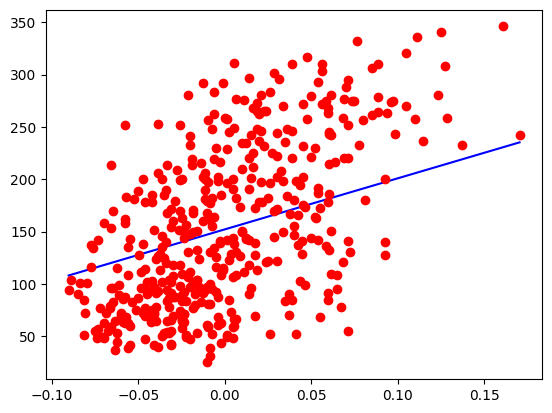

In [51]:
var_num = 2

x_points = np.linspace(min(X[:, np.newaxis, var_num]), max(X[:, np.newaxis, var_num]), 100)
y_points = dense1.biases.flatten() + dense1.weights[var_num] * x_points

plt.plot(x_points, y_points, 'b')

plt.plot(X[:, np.newaxis, var_num], y, 'ro')

plt.show()


## Ejercicio 11: Regularización L2 — capa

Actualiza la clase ```Layer```. Ahora debe contener también la inicialización de los parámetros ```self.weight_regularizer_l2``` y ```self.bias_regularizer_l2``` (por defecto, ambos deben valer ```0```). También debes actualizar el método ```backward``` para que tenga en cuenta el impacto de la regularización en ```self.dweights``` y ```self.dbiases```.

In [56]:
class Layer_Dense:

    def __init__(self, n_inputs, n_neurons, weight_regularizer_l2=0, bias_regularizer_l2=0):
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))
        self.weight_regularizer_l2 = weight_regularizer_l2
        self.bias_regularizer_l2 = bias_regularizer_l2

    def forward(self, inputs):
        self.inputs = inputs
        self.output = np.dot(inputs, self.weights) + self.biases

    def backward(self, dvalues):
        self.dweights = np.dot(self.inputs.T, dvalues)
        self.dweights += 2 * self.weight_regularizer_l2 * self.weights  # L2

        self.dbiases = np.sum(dvalues, axis=0, keepdims=True)
        self.dbiases += 2 * self.bias_regularizer_l2 * np.sum(self.biases, axis=1, keepdims=True)

        self.dinputs = np.dot(dvalues, self.weights.T)


## Ejercicio 12: Regularización L2 — péridas

Extiende la clase abstracta ```Loss``` para que incluya un método llamado ```regularization_loss(self, layer)``` que calcule el los términos de regularización de la función de pérdidas para la capa ```layer``` pasada como argumento. Una vez implementado, no olvides ejecutar de nuevo (o copiar y ejecutar) la clase ```Loss_MeanSquaredError``` para actualizarla. Las pérdidas de regularización que calcularás con esta función deberán añadirse a las "normales" que venías calculando hasta ahora (llamémoslas *perdidas de los datos*) para dar lugar a las pérdidas totales. Tenlo en cuenta para el siguiente ejercicio.

In [58]:
from abc import ABC, abstractmethod

class Loss(ABC):
    @abstractmethod
    def forward(self, output, y):
        pass

    def calculate(self, output, y):
        sample_losses = self.forward(output, y)
        data_loss = np.mean(sample_losses)
        return data_loss

    @abstractmethod
    def regularization_loss(self, layer):
        pass



## Ejercicio 13: Regresión — caso función seno

La base de datos ```sine_data``` del módulo ```nnfs.datasets``` es una sencilla representación de la función seno.

In [52]:
!pip install nnfs

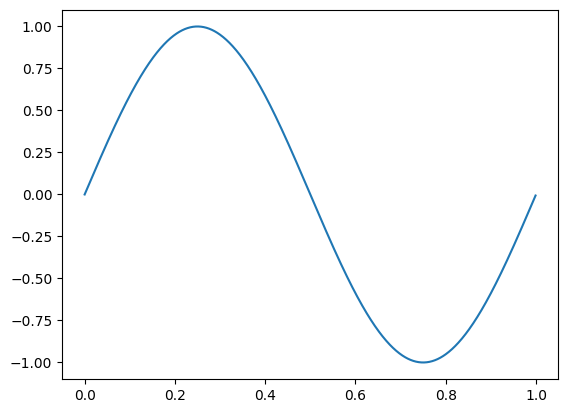

In [53]:
import numpy as np
import nnfs
from nnfs.datasets import sine_data

nnfs.init()

# Create dataset
X, y = sine_data()

plt.plot(X, y)
plt.show()

Este ejercicio plantea entrenar una red neuronal para que aprenda el comportamiento de esta función. Sigue el siguiente proceso:
 - Define la siguiente arquitectura: una capa con un único input y 64 neuronas + función de activación ReLU + otra capa con otras 64 neuronas (con parámetros ```weight_regularizer_l2=0.001``` y ```bias_regularizer_l2=0.001```) + función de activación ReLU + una última capa con 64 inputs y un único output que dará el valor predicho de $y$ tras pasar por una función de activación lineal.
 - Utiliza como función de pérdidas el error cuadrático medio.
 - Define el siguiente optimizador: ```Optimizer_SGD(learning_rate=0.05, decay=1e-3, momentum=0.9)```
 - Define la variable: ```accuracy_precision = np.std(y) / 250```. Servirá para calcular la precisión (*accuracy*). Durante el entrenamiento, puedes hacer: ```accuracy = np.mean(np.absolute(predictions - y) < accuracy_precision)```.
 - Realiza el entrenamiento (5000 iteraciones). Utiliza validación cruzada para evaluar los resultados.